In [9]:
import numpy as np 
import pandas as pd 
import time
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
#read in reviews csv
reviews_csv = "reviews.csv"
reviews_df = pd.read_csv(reviews_csv)

#read in reviews csv
items_csv = "20190928-items.csv"
items_df = pd.read_csv(items_csv)

#merged the 2 together on asin w/ left join
merged_df = pd.merge(items_df, reviews_df, how = "right", on = "asin")

#dropped unneeded columns
data_df = merged_df.drop(columns=["reviewUrl", "url", "image"], axis = 1)

#renamed columns
data_df = data_df.rename(columns={"title_x":"title","rating_x":"avgRating","rating_y":"rating","title_y":"reviewTitle"})

#deleted data before 2016-01-01
data_df["filter"] = data_df["date"].apply(lambda x: True if time.strptime(x,"%d-%b-%y")>=time.strptime("2016-01-01","%Y-%m-%d") else False)
post_2016 = data_df["filter"]==True
data_post_2016_df = data_df[post_2016]

cell_reviews_df = data_post_2016_df.drop(columns=["filter"]).reset_index(drop=True)
cell_reviews_df.head()

,asin,brand,title,avgRating,totalReviews,prices,name,rating,date,verified,reviewTitle,body,helpfulVotes
0,B0009N5L7K,Motorola,Motorola I265 phone,2.9,7,$49.95,Marcel Thomas,1,5-Mar-16,True,Stupid phone,DON'T BUY OUT OF SERVICE,NaN
1,B0009N5L7K,Motorola,Motorola I265 phone,2.9,7,$49.95,Stephen Cahill,1,20-Dec-16,True,Phones locked,1 star because the phones locked so I have to ...,NaN
2,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,2.6,22,NaN,"Kei, San Jose, CA",1,13-May-17,True,It seems it doesn't work with the existing AT&...,I purchased this phone for my AT&T phone repla...,NaN
3,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,2.6,22,NaN,MARIO GAUTIER,5,1-May-17,True,Five Stars,SERVED ME WELL AS A BACK UP PHONE.,NaN
4,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,2.6,22,NaN,Kristy,1,13-Mar-19,True,Supply are needed,The phone did not come with a charger and didn...,NaN


In [24]:
#save table to csv file
cell_reviews_df.to_csv("cell_reviews.csv",index=False)

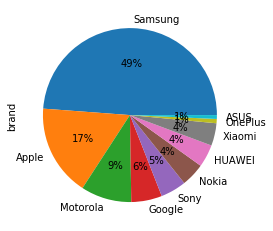

In [20]:
#created pie graph for brand counts to show break down of reviews by percentage
cell_reviews_df.brand.value_counts().plot(kind='pie', autopct='%1.0f%%')

In [21]:
#creating dataframe showing mean reviews by brand
cell_ratings_df = cell_reviews_df.groupby(["brand"]).mean()["rating"]
cell_ratings_df.head().reset_index()

,brand,rating
0,ASUS,3.712302
1,Apple,3.641173
2,Google,3.636634
3,HUAWEI,4.316055
4,Motorola,3.731447


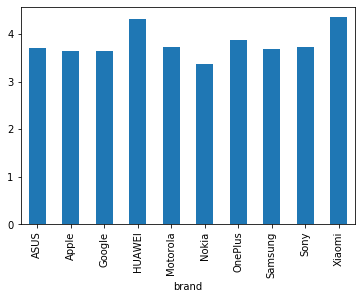

In [22]:
#created bar graph from cell_ratings_df
cell_ratings_df.plot.bar(x='brand', y='rating')